## Baseball Case Study

### Problem Statement:

### This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.

#### There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

We have to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.

In [1]:
#Loading the dataset
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('baseball.csv')
data.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [2]:
data.shape

(30, 17)

We have 30 Rows and 17 columns in the dataset.

In [3]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

We have only numerical data in all the columns. So we can use regression model approaches to find the best predictive model. Except the column 'ERA' all other columns are having integer values. The column "ERA" is having float data.

In [5]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### Features in Dataset(Independent Variable)

1. 'R' - **Runs scored**: number of times a player crosses home plate.
2. 'AB' - **At bat**: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
3. 'H' - **Hit**: reaching base because of a batted, fair ball without error by the defense. 
4. '2B' - **Double**: hits on which the batter reaches second base safely without the contribution of a fielding error.
5. '3B' - **Triple**: hits on which the batter reaches third base safely without the contribution of a fielding error.
6. 'HR' - **Home runs**: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
7. 'BB' - **Base on balls** (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
8. 'SO' - **Strike out** (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.
9. 'SB' - **Stolen base**: number of bases advanced by the runner while the ball is in the possession of the defense.
10. 'RA' - **Run average**: number of runs allowed times nine divided by innings pitched.
11. 'ER' - **Earned run**: number of runs that did not occur as a result of errors or passed balls.
12. 'ERA' - **Earned run average**: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
13. 'CG' - **Complete game**: number of games where player was the only pitcher for their team.
14. 'SHO' - **Shutout**: number of complete games pitched with no runs allowed.
15. 'SV - **Save**: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
16. 'E' - **Errors**: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

### Target in Dataset(Dependent Variable)

'W' - **Win**: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


We have 30 non values in each columns. 

### Checking for Missing Values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


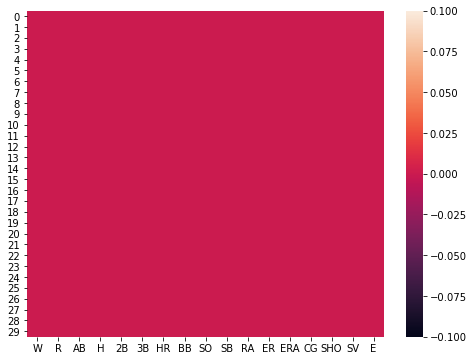

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[8,6])
sns.heatmap(data.isnull())
print(data.isnull().sum())

We are not having any null values in the dataset.

### Data Visualization

In [8]:
#User defined function to plot the columns in histogram plot.
import numpy as np

def histogramplot(col):
    plt.figure(figsize=[4,4])
    sns.histplot(x =col,data = data,bins =6,kde=True)
    print(np.histogram(data[col],bins=6))

(array([6, 3, 7, 6, 4, 4], dtype=int64), array([ 63.        ,  69.16666667,  75.33333333,  81.5       ,
        87.66666667,  93.83333333, 100.        ]))


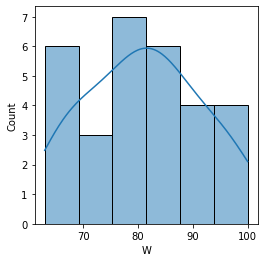

In [9]:
histogramplot('W')

From the above observation, most of the data in column 'W' is distributed between the range 0-70 and 75-87.

(array([ 3, 10, 12,  4,  0,  1], dtype=int64), array([573., 626., 679., 732., 785., 838., 891.]))


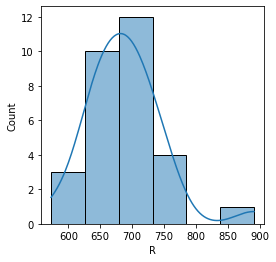

In [10]:
histogramplot('R')

From the above observations, most of the data in column 'R'is distributed between the range 625 to 730.

(array([4, 5, 7, 4, 6, 4], dtype=int64), array([5385., 5429., 5473., 5517., 5561., 5605., 5649.]))


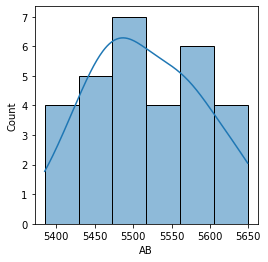

In [11]:
histogramplot('AB')

From the above observation, most of the data in column 'AB' is distributed between the range 5430-5510 and 5560-5605.

(array([ 6, 11,  4,  1,  3,  5], dtype=int64), array([1324.        , 1355.83333333, 1387.66666667, 1419.5       ,
       1451.33333333, 1483.16666667, 1515.        ]))


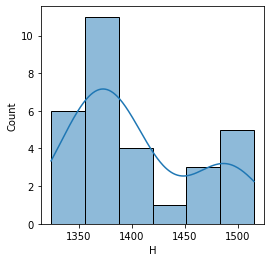

In [12]:
histogramplot('H')

From the above observations, most of the data in column 'H' is distributed between the range 1355-1390.

(array([ 3,  2,  5, 10,  7,  3], dtype=int64), array([236., 248., 260., 272., 284., 296., 308.]))


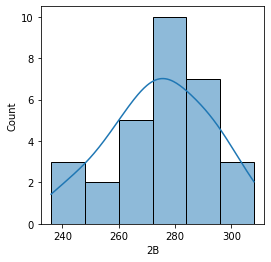

In [13]:
histogramplot('2B')

From the above obseravtions, most of the data in column '2B' is distributed between the range 270-296.

(array([4, 4, 7, 5, 5, 5], dtype=int64), array([13., 19., 25., 31., 37., 43., 49.]))


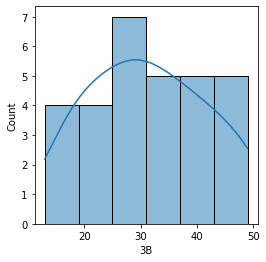

In [14]:
histogramplot('3B')

From the above observations, most of the data in column '3B' is distributed between the range 25 to 49.

(array([2, 7, 7, 9, 1, 4], dtype=int64), array([100., 122., 144., 166., 188., 210., 232.]))


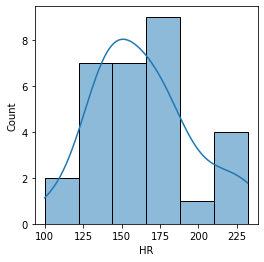

In [15]:
histogramplot('HR')

From the above observations, most of the data in column 'HR' is distributed bwetween the range 122 to 190.

(array([5, 6, 4, 8, 2, 5], dtype=int64), array([375. , 407.5, 440. , 472.5, 505. , 537.5, 570. ]))


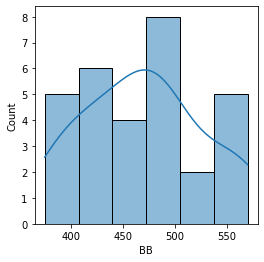

In [16]:
histogramplot('BB')

From the above observations, most of the data in column 'BB' is distributed between the range 375-440, 470-505 and 540 to 570.

(array([ 1,  6,  5, 15,  2,  1], dtype=int64), array([ 973.        , 1063.83333333, 1154.66666667, 1245.5       ,
       1336.33333333, 1427.16666667, 1518.        ]))


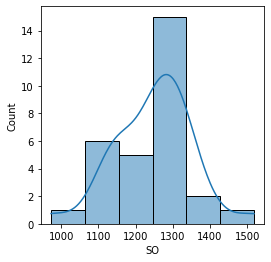

In [17]:
histogramplot('SO')

From the above observations, most of the data in column 'SO' is distributed between the range 1240 to 1330.

(array([4, 8, 8, 5, 2, 3], dtype=int64), array([ 44.,  59.,  74.,  89., 104., 119., 134.]))


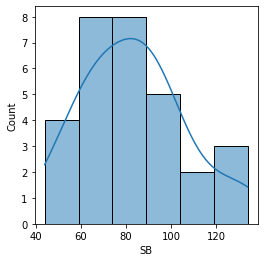

In [18]:
histogramplot('SB')

From the above observations, most of the data in column 'SB' is distributed between the range 60 to 90.

(array([ 1,  6,  7, 10,  3,  3], dtype=int64), array([525.        , 578.16666667, 631.33333333, 684.5       ,
       737.66666667, 790.83333333, 844.        ]))


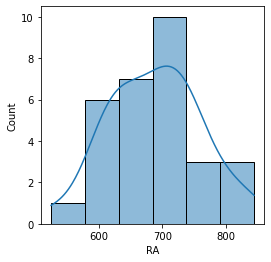

In [19]:
histogramplot('RA')

From the above observations, most of the data in column 'RA' is distributed between the range 690 to 740.

(array([ 1,  7,  6, 10,  3,  3], dtype=int64), array([478. , 531.5, 585. , 638.5, 692. , 745.5, 799. ]))


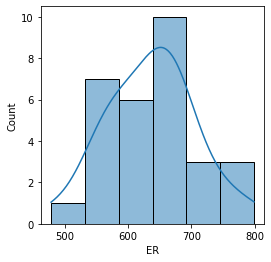

In [20]:
histogramplot('ER')

From the above observations, most of the data in column 'ER' is distributed between the range 530 to 690.

(array([ 2,  5,  7, 12,  2,  2], dtype=int64), array([2.94, 3.29, 3.64, 3.99, 4.34, 4.69, 5.04]))


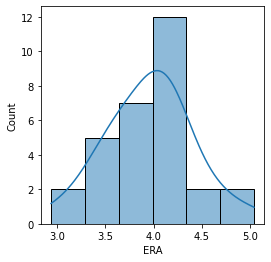

In [21]:
histogramplot('ERA')

From the above observations, most of the data in column 'ERA' is distributed between the range 3.99 - 4.35.

(array([10,  7,  5,  7,  0,  1], dtype=int64), array([ 0.        ,  1.83333333,  3.66666667,  5.5       ,  7.33333333,
        9.16666667, 11.        ]))


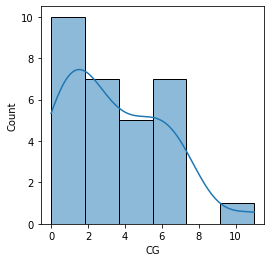

In [22]:
histogramplot('CG')

From the above observations, most of the data in column 'CG' is distributed between the range 0-7.33.

(array([ 3,  6, 12,  6,  1,  2], dtype=int64), array([ 4.        ,  6.83333333,  9.66666667, 12.5       , 15.33333333,
       18.16666667, 21.        ]))


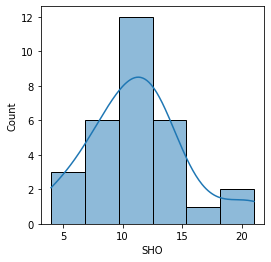

In [23]:
histogramplot('SHO')

From the above observations, most of the data in column 'SHO' is distributed between the range 9.5 to 15.

(array([1, 9, 8, 8, 2, 2], dtype=int64), array([28.        , 33.66666667, 39.33333333, 45.        , 50.66666667,
       56.33333333, 62.        ]))


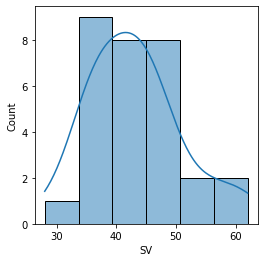

In [24]:
histogramplot('SV')

From the above observations, most of the data in column 'SV' is distributed between the range 33 to 50.

(array([ 5, 10,  8,  1,  3,  3], dtype=int64), array([ 75. ,  83.5,  92. , 100.5, 109. , 117.5, 126. ]))


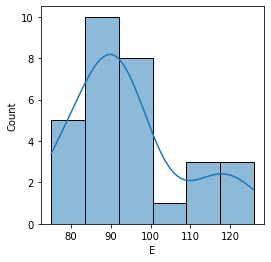

In [25]:
histogramplot('E')

From the above observations, most of the data in column 'E' is distributed between the range 83.5 to 100.

#### Bivariate Analysis

Now we can check the relationship of each dependent column with the target column.

<AxesSubplot:xlabel='R', ylabel='W'>

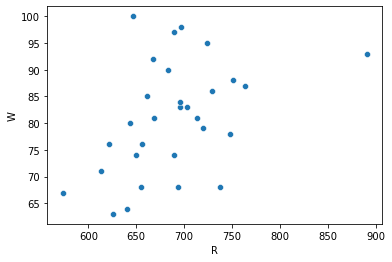

In [26]:
sns.scatterplot('R','W',data = data)

From the above observation, the data is scattered in column 'R' and one of the value is plotted far away from other data. Possible outlier is present in the data. Also a positive relation is showing with the target variable.

<AxesSubplot:xlabel='AB', ylabel='W'>

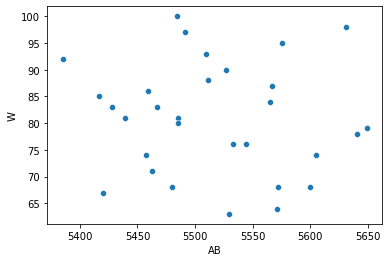

In [27]:
sns.scatterplot('AB','W',data = data)

From the above observations, the data is scattered in column 'AB'.

<AxesSubplot:xlabel='H', ylabel='W'>

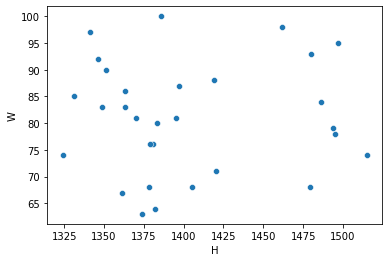

In [28]:
sns.scatterplot('H','W',data = data)

From the above observations the data in column 'H' is scattered.

<AxesSubplot:xlabel='2B', ylabel='W'>

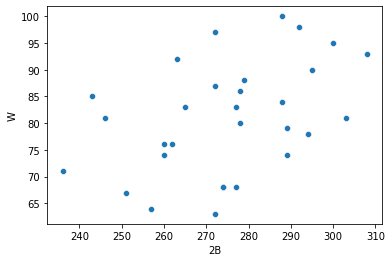

In [29]:
sns.scatterplot('2B','W',data = data)

From the above observations, the data in column '2B' is scattered and slight positive relation is showing with the target variable.

<AxesSubplot:xlabel='3B', ylabel='W'>

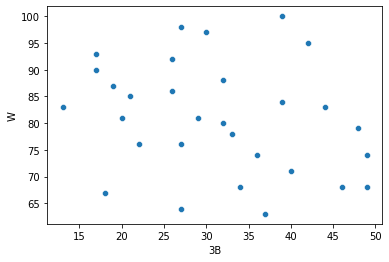

In [30]:
sns.scatterplot('3B','W',data = data)

From the above observations, the data in column '3B' is scattered and slight negative relation is showing with the target variable.

<AxesSubplot:xlabel='HR', ylabel='W'>

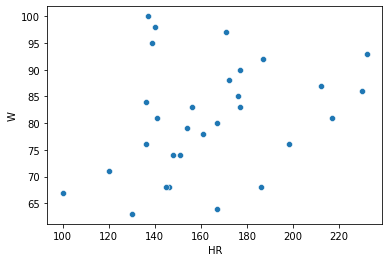

In [31]:
sns.scatterplot('HR','W',data = data)

From the above observation, the data in column 'HR' is scattered and is showing a positve relation with target variable.

<AxesSubplot:xlabel='BB', ylabel='W'>

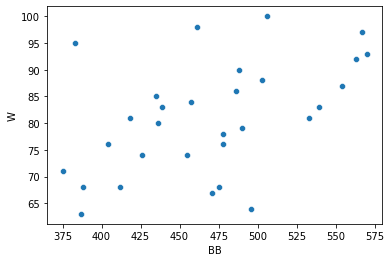

In [32]:
sns.scatterplot('BB','W',data = data)

From the above observation, the data in column 'BB' is scattered and showing a positve relation to the target variable.

<AxesSubplot:xlabel='SO', ylabel='W'>

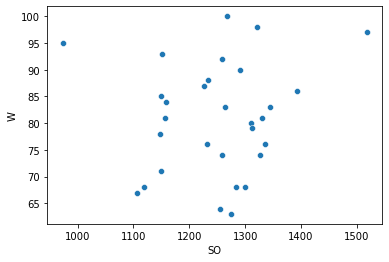

In [33]:
sns.scatterplot('SO','W',data = data)

From the above observation the data in column 'SO' is scattered and is showing a positve relation to the target variable.

<AxesSubplot:xlabel='SB', ylabel='W'>

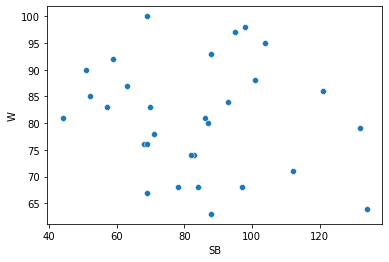

In [34]:
sns.scatterplot('SB','W',data = data)

From the above osbervations, the data in column 'SB' is scattered.

<AxesSubplot:xlabel='RA', ylabel='W'>

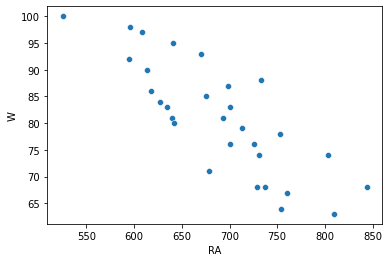

In [35]:
sns.scatterplot('RA','W',data = data)

From the above observations, the data in column 'RA' is scattered but is showing a negative relation with the target variable.

<AxesSubplot:xlabel='ER', ylabel='W'>

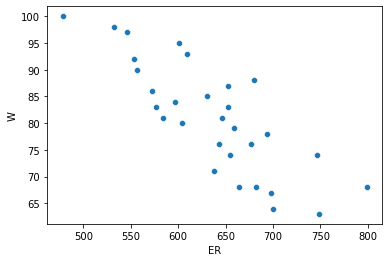

In [36]:
sns.scatterplot('ER','W',data = data)

From the above observations, the data in column 'ER' is scattered but is showing a negative relation with the target variable.

<AxesSubplot:xlabel='ERA', ylabel='W'>

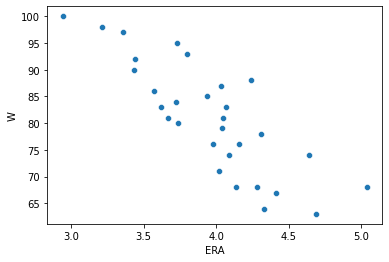

In [37]:
sns.scatterplot('ERA','W',data = data)

From the above observations, the data in column 'ERA' is scattered but is showing a negative relation with the target variable.

<AxesSubplot:xlabel='CG', ylabel='W'>

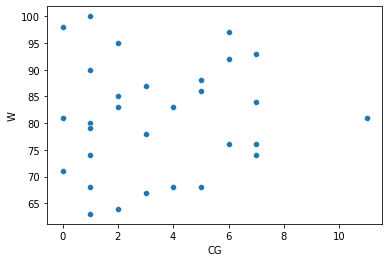

In [38]:
sns.scatterplot('CG','W',data = data)

From the above observations, the data in column 'CG' is scattered

<AxesSubplot:xlabel='SHO', ylabel='W'>

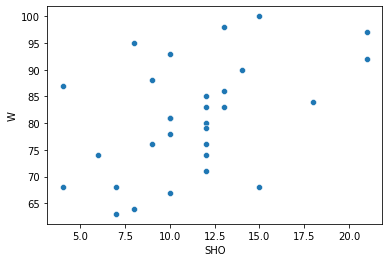

In [39]:
sns.scatterplot('SHO','W',data = data)

From the above observations, the data in column 'SHO' is scattered and showing a slight positive relation to the target variable.

<AxesSubplot:xlabel='SV', ylabel='W'>

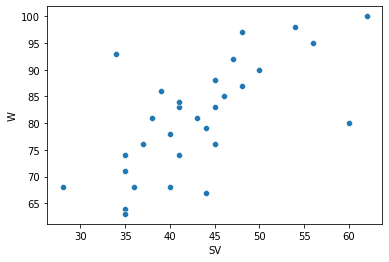

In [40]:
sns.scatterplot('SV','W',data = data)

From the above observations, the data in column 'SV' is scattered but is showing a positive relation with the target variable.

<AxesSubplot:xlabel='E', ylabel='W'>

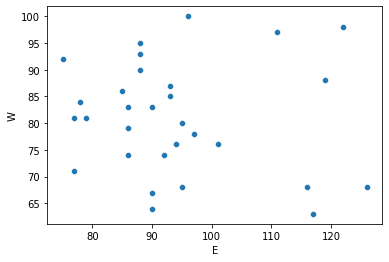

In [41]:
sns.scatterplot('E','W',data = data)

From the above observations, the data in column 'E' is scattered. 

### Statistical Summary

#### Describe of the data

In [42]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

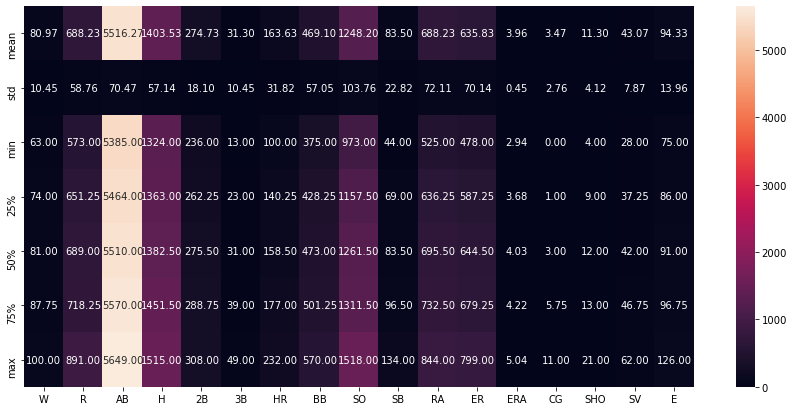

In [43]:
plt.figure(figsize=[15,7])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.2f')

The mean of the data is higher than the median for the columns ['AB','H','3B','HR','CG','SV','E']. That means, possible skewness is present in the data of these columns.

### Correlation

In [44]:
Correlation  = data.corr()
Correlation

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

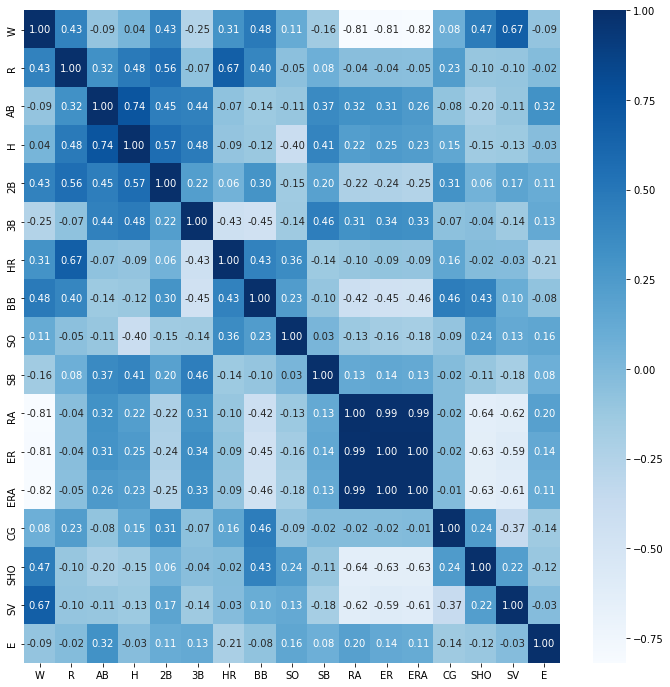

In [45]:
#Plotting the correlation of columns
plt.figure(figsize=[12,12])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='Blues')

Since there are more number of columns, we can see negative and positive correlations with the variables.

### Correlation with Target Column(W)

SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64


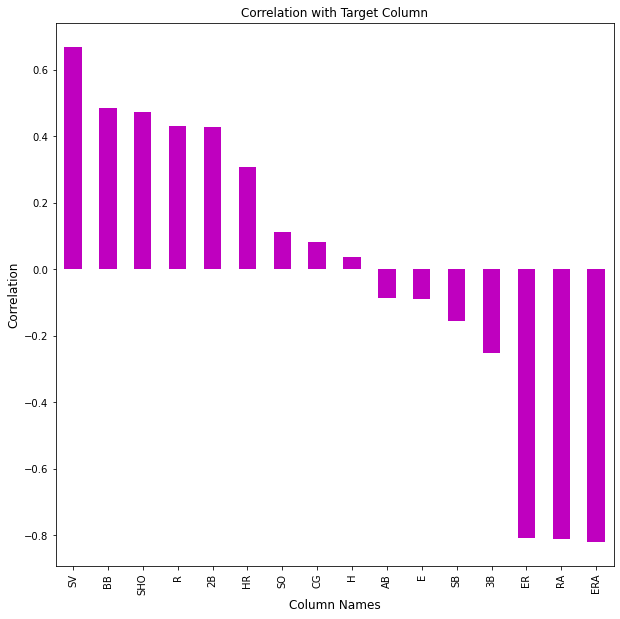

In [46]:
print(Correlation['W'][1:].sort_values(ascending = False))
plt.figure(figsize = [10,10])
Correlation['W'].sort_values(ascending=False).drop('W').plot(kind='bar',color = 'm')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()


#### Observations

1. The columns **['SV','BB','SHO','R','2B','HR','SO','CG','H']** are having **positive correlation** to the target variable. While the columns **['AB','E','SB'3B'.'ER','RA','ERA']** are having **negative correlation** to the target variable.
2. The column 'SV' is having highest positive correlation to the target variable of 66.65%. It has a strong positve bond with the target variable.
3. The column 'ERA' is having the highest negative correlation to the target variable of 81.96%. It has a strong negative bond with the target variable.
4. The columns ['RA','ER'] are also having high negative correlation to the target variable. 
5. The column 'H' is having the least positive correlation to the target variable(3.76%). The column 'AB' is having the least negative correlation to the target variable(8.79%).

### Distribution of data in columns(Checking skewness of data)

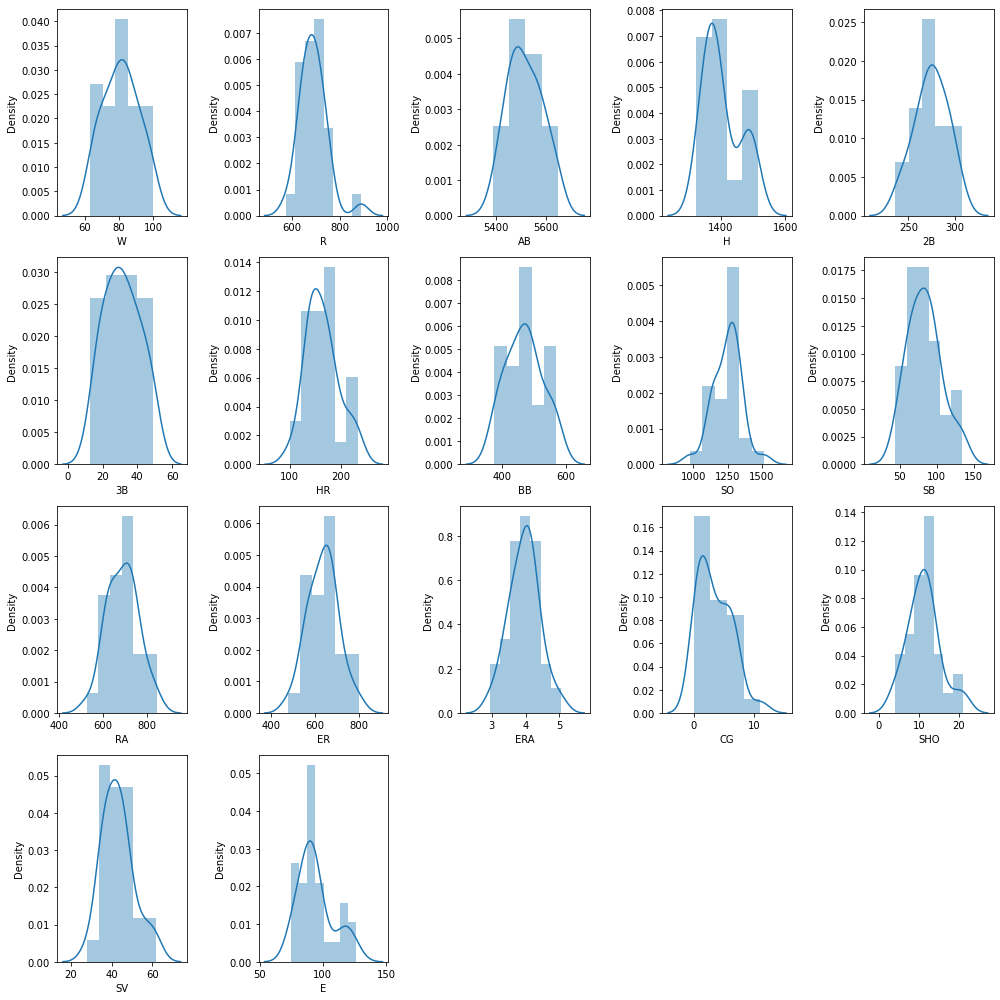

In [47]:
plt.figure(figsize = [14,14])
for i in range(0,len(data.columns.values)):
    plt.subplot(4,5,i+1)
    sns.distplot(data[data.columns.values[i]])
    plt.tight_layout()

The data is not normally distributed and skewness is present all the columns. 

### Skewness

In [48]:
Skewness = data.skew()
Skewness.sort_values(ascending = False)

R      1.200786
E      0.890132
CG     0.736845
H      0.670254
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
W      0.047089
RA     0.045734
SO    -0.156065
2B    -0.230650
dtype: float64

The columns ['SO','2B'] are negatively skewed. Extreme skewness is present in column ['R', 'E']. Skewness is also present in the column 'W', but we can ignore it as it is our target variable.

### Checking the presence of outliers.

In [49]:
#User defined function to plot the outlers of each columns using boxplot
def box(col):
    plt.figure(figsize =[3,6])
    sns.boxplot(y = data[col])
    plt.show()

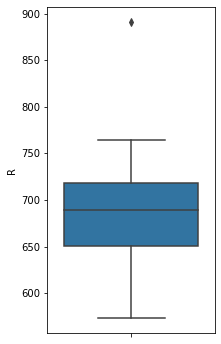

In [50]:
box('R')

There is one outlier present in the data of column 'R'.

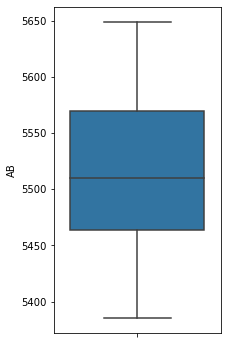

In [51]:
box('AB')

There are no outliers present in the data.

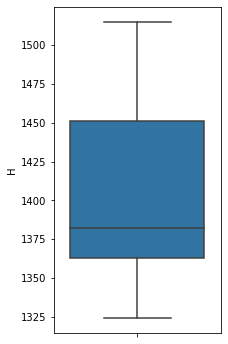

In [52]:
box('H')

There are no outliers present in the data.

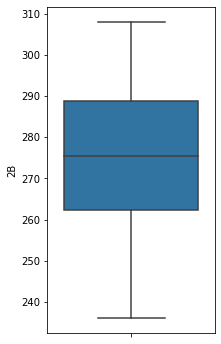

In [53]:
box('2B')

There are no outliers present in the data.

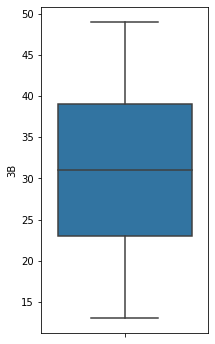

In [54]:
box('3B')

There are no outliers present in the data.

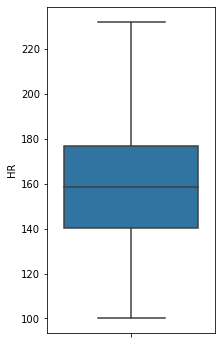

In [55]:
box('HR')

There are no outliers present in the data.

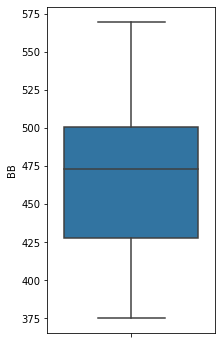

In [56]:
box('BB')

There are no outliers present in the data.

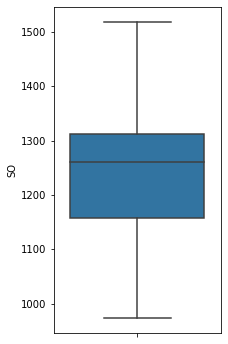

In [57]:
box('SO')

There are no outliers present in the data.


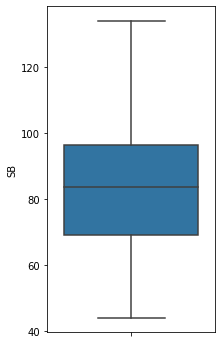

In [58]:
box('SB')

There are no outliers present in the data.

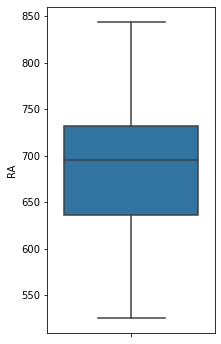

In [59]:
box('RA')

There are no outliers present in the data.

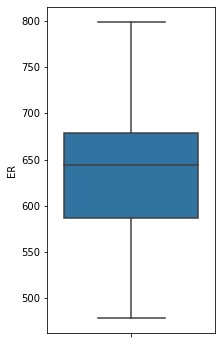

In [60]:
box('ER')

There are no outliers present in the data.

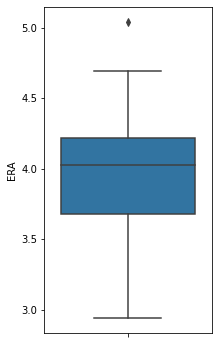

In [61]:
box('ERA')

There is one outlier present in the data of column 'ERA'.

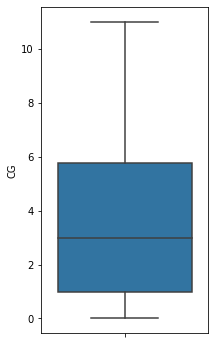

In [62]:
box('CG')

There are no outliers present in the data.

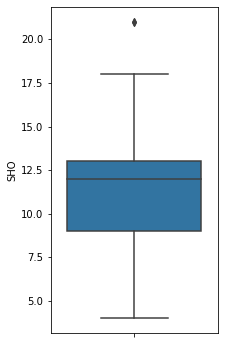

In [63]:
box('SHO')

There is one outlier present in the data of column 'SHO'.

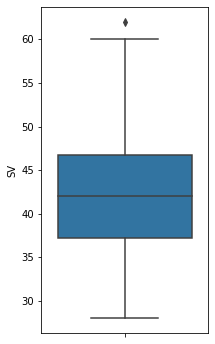

In [64]:
box('SV')

There is one outlier present in the data of column 'SV'.

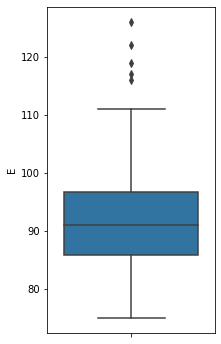

In [65]:
box('E')

Outliers are present in the data of column 'E'.

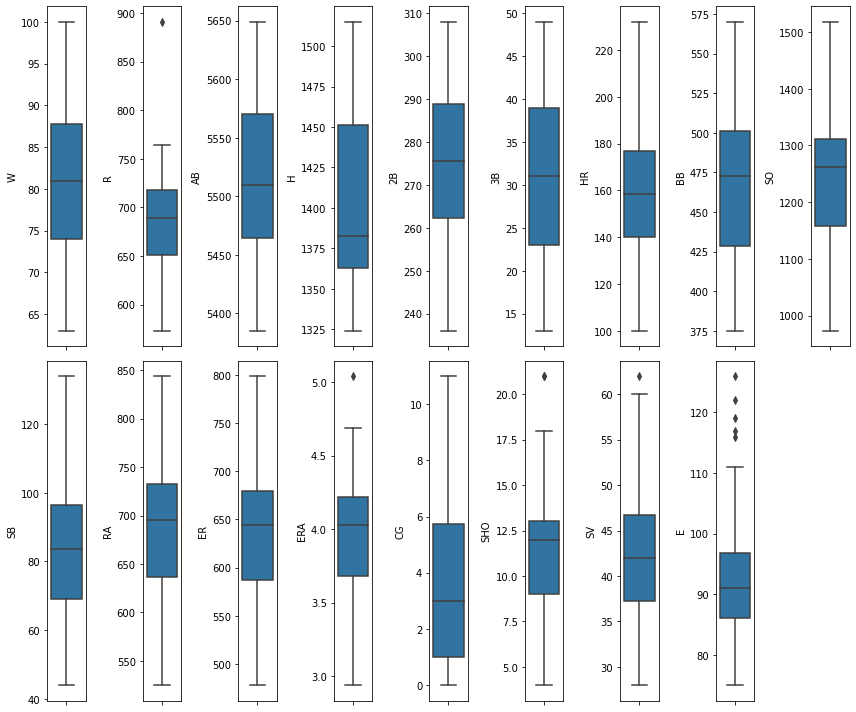

In [66]:
#Plotting the data of every columns with boxplot to check the outliers
plt.figure(figsize = [12,10])
for i in range(0,len(data.columns.values)):
    plt.subplot(2,9,i+1)
    sns.boxplot(y = data[data.columns.values[i]])
    plt.tight_layout()

Only the columns ['R','ERA','SHO','SV','E'] are having outliers in the data.

### Splitting the data before removing skewness

In [67]:
x = data.drop(['W'],axis = 1)
y = data.W

In [68]:
print(x.shape)
print(y.shape)

(30, 16)
(30,)


In [69]:
#We are setting the standard limit for skewness as +/-0.5.
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

R      1.200786
E      0.890132
CG     0.736845
H      0.670254
SV     0.657524
SHO    0.565790
HR     0.516441
dtype: float64

Skewness is present in column ['R,'E','CG','H','SV','SHO','HR] after setting the standard limit as +/-0.5. Lets remove the skewness in these columns by transforming the data.

In [70]:
from sklearn.preprocessing import power_transform
#user defined function for removing skewness for columns which are beyond standard range
def rskew(col):
    x[col]=power_transform((x[col].values.reshape(-1,1)),method='yeo-johnson')

In [71]:
rskew('R')
rskew('E')
rskew('CG')
rskew('H')
rskew('SV')
rskew('SHO')
rskew('HR')

In [72]:
#Now we can validate whether the skewness is removed for the column
x.skew()

R      0.000000
AB     0.183437
H      0.000000
2B    -0.230650
3B     0.129502
HR    -0.000065
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

In [73]:
x.shape

(30, 16)

In [74]:
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

Series([], dtype: float64)

The skewness of the data has been removed using power transform

### Removing Outliers

#### Splitting the data before removing outliers

In [75]:
from scipy.stats import zscore
df = x.copy()
df['W'] = y.copy()
z = np.abs(zscore(df))
z = np.nan_to_num(z)
z

array([[0.        , 0.84773126, 0.        , 1.42017307, 1.04119304,
        0.76462586, 1.53490242, 2.69762957, 0.91388329, 0.66623393,
        0.50511008, 0.50695519, 0.35984364, 0.78957937, 1.546378  ,
        0.3349525 , 1.3654086 ],
       [0.        , 0.71109353, 0.        , 0.12740339, 1.23580856,
        0.15858141, 0.5365919 , 0.15487844, 0.60182558, 0.16597077,
        0.24892985, 0.25459752, 0.35984364, 0.25177537, 0.36044386,
        0.53221128, 0.1978383 ],
       [0.        , 1.1152333 , 0.        , 1.58879521, 0.22380785,
        0.68967629, 1.13914361, 0.89398189, 0.11144918, 0.68033909,
        0.75162313, 0.64134684, 1.99351257, 0.24539345, 0.6075936 ,
        1.34233137, 0.00324325],
       [0.        , 0.24152162, 0.        , 0.82812203, 0.41842337,
        0.8790486 , 1.16053598, 0.16860185, 0.69098493, 0.18007593,
        0.10392217, 0.05301004, 1.22010317, 0.51075929, 0.76445333,
        0.67852361, 0.48324437],
       [0.        , 1.28073815, 0.        , 0.801891

In [76]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,0.0,5575,0.0,300,42,-0.764626,383,973,104,641,601,3.73,-0.359844,-0.789579,1.546378,-0.334953,95
1,0.0,5467,0.0,277,44,-0.158581,439,1264,70,700,653,4.07,-0.359844,0.251775,0.360444,-0.532211,83
2,0.0,5439,0.0,303,29,-0.689676,533,1157,86,640,584,3.67,1.993513,-0.245393,-0.607594,-1.342331,81
3,0.0,5533,0.0,260,27,-0.879049,404,1231,68,701,643,3.98,1.220103,-0.510759,-0.764453,0.678524,76
4,0.0,5605,0.0,289,49,-0.329850,455,1259,83,803,746,4.64,1.220103,0.251775,-1.095010,-0.532211,74
5,0.0,5509,0.0,308,17,1.937860,570,1151,88,670,609,3.80,1.220103,-0.245393,-1.269438,-0.334953,93
6,0.0,5567,0.0,272,19,1.460099,554,1227,63,698,652,4.03,0.064630,-2.099326,0.718082,0.104539,87
7,0.0,5485,0.0,246,20,1.583551,418,1331,44,693,646,4.05,-1.729889,-0.245393,0.104606,-1.614550,81
8,0.0,5485,0.0,278,32,0.200058,436,1310,87,642,604,3.74,-0.909181,0.251775,1.905480,0.261504,80
9,0.0,5640,0.0,294,33,0.007404,478,1148,71,753,694,4.31,0.064630,-0.245393,-0.309109,0.409004,78


In [77]:
df.shape

(30, 17)

In [78]:
df_new.shape

(30, 17)

After adjusting the skewness of the data in column newspaper, there are no outliers to be removed from the data. So we are not losing any data

### Checking the Multicolinearity of variables in the dataframe

In [81]:
x = df.drop(['W'],axis = 1)
y = df.W
c = x.columns
print(x.shape)
print(y.shape)

(30, 16)
(30,)


In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = c)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.0,0.847731,0.0,1.420173,1.041193,-0.764626,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.359844,-0.789579,1.546378,-0.334953
1,0.0,-0.711094,0.0,0.127403,1.235809,-0.158581,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.359844,0.251775,0.360444,-0.532211
2,0.0,-1.115233,0.0,1.588795,-0.223808,-0.689676,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,1.993513,-0.245393,-0.607594,-1.342331
3,0.0,0.241522,0.0,-0.828122,-0.418423,-0.879049,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.220103,-0.510759,-0.764453,0.678524
4,0.0,1.280738,0.0,0.801892,1.722347,-0.329850,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.220103,0.251775,-1.095010,-0.532211
5,0.0,-0.104884,0.0,1.869832,-1.391501,1.937860,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.220103,-0.245393,-1.269438,-0.334953
6,0.0,0.732263,0.0,-0.153633,-1.196885,1.460099,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,0.064630,-2.099326,0.718082,0.104539
7,0.0,-0.451289,0.0,-1.615025,-1.099578,1.583551,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.729889,-0.245393,0.104606,-1.614550
8,0.0,-0.451289,0.0,0.183611,0.068115,0.200058,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.909181,0.251775,1.905480,0.261504
9,0.0,1.785913,0.0,1.082929,0.165423,0.007404,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,0.064630,-0.245393,-0.309109,0.409004


In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#User defined function to calculate variance of inflation in trian data.
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values('VIF Factor',ascending = False))

In [85]:
calc_vif(x)

,Column Name,VIF Factor
10,ER,1423.551111
11,ERA,970.582127
9,RA,187.474624
1,AB,6.866230
14,SV,4.568878
6,BB,3.288995
3,2B,3.283217
13,SHO,3.116554
5,HR,2.753092
4,3B,2.709475


Multicolinearity is present in columns ['ER','ERA','AB','RA']. Let's first try dropping few columns with variance of inflation and calculate the VIF again.

In [86]:
x1 = x.copy()
x1.drop(['ERA','RA'],axis = 1, inplace = True)
x1

,R,AB,H,2B,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E
0,0.0,0.847731,0.0,1.420173,1.041193,-0.764626,-1.534902,-2.697630,0.913883,-0.505110,-0.359844,-0.789579,1.546378,-0.334953
1,0.0,-0.711094,0.0,0.127403,1.235809,-0.158581,-0.536592,0.154878,-0.601826,0.248930,-0.359844,0.251775,0.360444,-0.532211
2,0.0,-1.115233,0.0,1.588795,-0.223808,-0.689676,1.139144,-0.893982,0.111449,-0.751623,1.993513,-0.245393,-0.607594,-1.342331
3,0.0,0.241522,0.0,-0.828122,-0.418423,-0.879049,-1.160536,-0.168602,-0.690985,0.103922,1.220103,-0.510759,-0.764453,0.678524
4,0.0,1.280738,0.0,0.801892,1.722347,-0.329850,-0.251360,0.105866,-0.022290,1.597501,1.220103,0.251775,-1.095010,-0.532211
5,0.0,-0.104884,0.0,1.869832,-1.391501,1.937860,1.798742,-0.952796,0.200609,-0.389104,1.220103,-0.245393,-1.269438,-0.334953
6,0.0,0.732263,0.0,-0.153633,-1.196885,1.460099,1.513510,-0.207812,-0.913883,0.234429,0.064630,-2.099326,0.718082,0.104539
7,0.0,-0.451289,0.0,-1.615025,-1.099578,1.583551,-0.910958,0.811641,-1.760897,0.147424,-1.729889,-0.245393,0.104606,-1.614550
8,0.0,-0.451289,0.0,0.183611,0.068115,0.200058,-0.590073,0.605790,0.156029,-0.461608,-0.909181,0.251775,1.905480,0.261504
9,0.0,1.785913,0.0,1.082929,0.165423,0.007404,0.158660,-0.982204,-0.557246,0.843461,0.064630,-0.245393,-0.309109,0.409004


In [87]:
calc_vif(x1)

,Column Name,VIF Factor
9,ER,4.241712
6,BB,2.788860
11,SHO,2.760756
3,2B,2.582954
4,3B,2.569705
1,AB,2.271620
10,CG,2.215830
12,SV,1.920490
5,HR,1.888100
7,SO,1.759481


After dropping the columns ['ERA','RA'] the variance of inflation is reduced and is now under 5. So our model is now not having much multicolinearity.

In [88]:
#Steps performed till now
#1.Loaded data
#2. Observed the type of data, features and target of dataset, shape of the dataset(rows and columns).
#3. Checked for missing values
#4. Data visualization 
    #Univariate analysis - Using histogram plot
    #Bivariate analysis(with target column) - Using scatter plot

# Statistical Summary
#5. Describe of the data
#6. Correlation of the data
#7. Correlation of columns with target variable
#8. Distribution of data in columns - Skewess
#9. Checking for outliers in data
#10. Removed skewness in columns after setting the standard limit as +/-0.5.
#11. Removed outliers(None was present after skewness was removed).
#12. Checked the Multicolinearity of variables and dropped two columns with high variance of inflation.

### EDA Completed

### Building the Model

#### Splitting the data into features and target

In [89]:
features = x1.copy()
target = y.copy()

In [90]:
print(features.shape)
print(target.shape)

(30, 14)
(30,)


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.linear_model import Lasso,Ridge,ElasticNet  #Reguralization technique

from sklearn.model_selection import train_test_split

In [92]:
lr = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
estimator = [('LR', LinearRegression()),
             ('KNN',KNeighborsRegressor()),
             ('SVR', SVR(gamma='auto')),
             ('DTR',DecisionTreeRegressor()),
             ('RFR',RandomForestRegressor(n_estimators=100))]
vtr = VotingRegressor(estimators=estimator)

#### Finding the best random_state

In [93]:
#User defined function for finding the best random state
def best_ran(model):
    maxacc = 0
    maxrs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = r2_score(target_test,pred_test)
        if acc>maxacc:
            maxacc = acc
            maxrs = i
    print("At random state ", maxrs, 'the model is having r2 score of ', maxacc)

In [94]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    acc = r2_score(target_test,pred_test)
    mse = mean_squared_error(target_test,pred_test)
    mae = mean_absolute_error(target_test,pred_test)
    print("R2 score is ", acc)
    print("_"*50)
    print("Mean Sqaured Error is ",mse)
    print("_"*50)
    print("Mean Absolute Error is ",mae)
    print("_"*50)

#### LinearRegression

In [95]:
best_ran(lr)

LinearRegression()
At random state  48 the model is having r2 score of  0.9322924584492821


In [96]:
mod_test(lr,48)
print("Coefficent is ",lr.coef_)
print("_"*50)
print("Intercept is ",lr.intercept_)
print("_"*50)

LinearRegression()
R2 score is  0.9322924584492821
__________________________________________________
Mean Sqaured Error is  9.795024344337195
__________________________________________________
Mean Absolute Error is  2.5003194700042974
__________________________________________________
Coefficent is  [ 0.00000000e+00 -8.34064973e-02  4.44089210e-16  1.21602348e+00
  1.80844012e+00  3.42545935e+00  1.04014798e+00 -1.64096006e+00
 -4.38070473e-01 -6.13122972e+00  2.51149672e-01  8.83617223e-02
  3.87781126e+00  1.17592293e+00]
__________________________________________________
Intercept is  81.10839187639215
__________________________________________________


#### KNeighborsRegressor

In [97]:
best_ran(knn)

KNeighborsRegressor()
At random state  27 the model is having r2 score of  0.7321461467608226


In [98]:
mod_test(knn,27)

KNeighborsRegressor()
R2 score is  0.7321461467608226
__________________________________________________
Mean Sqaured Error is  24.233333333333363
__________________________________________________
Mean Absolute Error is  3.5666666666666678
__________________________________________________


#### SVR

In [99]:
best_ran(svr)

SVR()
At random state  87 the model is having r2 score of  0.2412599761030857


In [100]:
mod_test(svr,87)

SVR()
R2 score is  0.2412599761030857
__________________________________________________
Mean Sqaured Error is  32.731201586441884
__________________________________________________
Mean Absolute Error is  5.156603742672405
__________________________________________________


#### DecisionTreeRegressor

In [101]:
best_ran(dtr)

DecisionTreeRegressor()
At random state  97 the model is having r2 score of  0.702842377260982


In [102]:
mod_test(dtr,97)

DecisionTreeRegressor()
R2 score is  0.6770025839793281
__________________________________________________
Mean Sqaured Error is  41.666666666666664
__________________________________________________
Mean Absolute Error is  5.666666666666667
__________________________________________________


#### RandomForestRegressor

In [103]:
best_ran(rfr)

RandomForestRegressor()
At random state  93 the model is having r2 score of  0.8095009808500699


In [104]:
mod_test(rfr,71)

RandomForestRegressor()
R2 score is  0.7855496240601498
__________________________________________________
Mean Sqaured Error is  6.338200000000018
__________________________________________________
Mean Absolute Error is  2.0266666666666686
__________________________________________________


#### AdaBoostRegressor

In [105]:
best_ran(abr)

AdaBoostRegressor()
At random state  99 the model is having r2 score of  0.7800352775015186


In [106]:
mod_test(abr,75)

AdaBoostRegressor()
R2 score is  0.37124101810376986
__________________________________________________
Mean Sqaured Error is  62.386863425925945
__________________________________________________
Mean Absolute Error is  6.493055555555557
__________________________________________________


#### GradientBoostingRegressor

In [107]:
best_ran(gbr)

GradientBoostingRegressor()
At random state  99 the model is having r2 score of  0.8063804427648276


In [108]:
mod_test(gbr,99)

GradientBoostingRegressor()
R2 score is  0.7922429275815693
__________________________________________________
Mean Sqaured Error is  28.145312282907962
__________________________________________________
Mean Absolute Error is  3.9960509150972783
__________________________________________________


#### VotingRegressor

In [109]:
best_ran(vtr)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At random state  83 the model is having r2 score of  0.8005911990233033


In [110]:
mod_test(vtr,83)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
R2 score is  0.8453830950057757
__________________________________________________
Mean Sqaured Error is  19.309933468167564
__________________________________________________
Mean Absolute Error is  3.370278311242849
__________________________________________________


#### From the above algorithms, the linear regression is providing the maximum R2 Score of 93.2%. Now let's cross validate the models to check whether they are performing well with cross validation or not.

### Cross Validation

In [111]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

#### LinearRegression

In [112]:
cross_val(lr,48)

LinearRegression()
At cv fold 4  the cv score is  0.43026843493413114 and the R2 score  is  0.9322924584492821


#### KNeighborsRegressor

In [113]:
cross_val(knn,27)

KNeighborsRegressor()
At cv fold 3  the cv score is  0.3029591381092075 and the R2 score  is  0.7321461467608226


#### SVR

In [114]:
cross_val(svr,87)

SVR()
At cv fold 0  the cv score is  0 and the R2 score  is  0.2412599761030857


#### DecisionTreeRegressor

In [115]:
cross_val(dtr,97)

DecisionTreeRegressor()
At cv fold 0  the cv score is  0 and the R2 score  is  0.6963824289405685


#### RandomForestRegressor

In [116]:
cross_val(rfr,71)

RandomForestRegressor()
At cv fold 3  the cv score is  0.32708593104983535 and the R2 score  is  0.8544492481203003


#### AdaBoostRegressor

In [117]:
cross_val(abr,75)

AdaBoostRegressor()
At cv fold 3  the cv score is  0.5165914634061962 and the R2 score  is  0.551099443136717


#### GradientBoostingRegressor

In [118]:
cross_val(gbr,99)

GradientBoostingRegressor()
At cv fold 3  the cv score is  0.30647514817618876 and the R2 score  is  0.7775906329417819


#### VotingRegressor

In [119]:
cross_val(vtr,83)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At cv fold 3  the cv score is  0.4840207688944371 and the R2 score  is  0.8196164322865437


#### The Linear Regression model(lr) is giving the maximum R2 score and Cross validation mean score after cross validation. So we can choose the Linear Regression model as the best model. The model Linear Regression(lr) is providing R2 score of 93.22% and a cross validation mean score of 43.02%.

In [120]:
lr = LinearRegression()
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 48)
lr.fit(features_train, target_train)
pred_test = lr.predict(features_test)

cv_score = cross_val_score(lr,features, target, cv = 4)
cv_mean =cv_score.mean()
print("At cv fold",4," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

At cv fold 4  the cv score is  0.43026843493413114 and the R2 score  is  0.9322924584492821


### Regularization

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}

### Lasso(L1)

In [122]:
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [123]:
ls = Lasso(alpha = 1, random_state = 0)
ls.fit(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.8751553529545917

In [124]:
cross_val(ls,0)

Lasso(alpha=1, random_state=0)
At cv fold 4  the cv score is  0.6277419794928598 and the R2 score  is  0.638451557583355


### Ridge(L2)

In [125]:
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [126]:
rd = Ridge(alpha = 1,random_state=0)
rd.fit(features_train,target_train)
pred_rd = rd.predict(features_test)

rds = r2_score(target_test,pred_rd)
rds

0.9282091794420161

In [127]:
cross_val(rd,0)

Ridge(alpha=1, random_state=0)
At cv fold 4  the cv score is  0.599469969661109 and the R2 score  is  0.5226951586697818


### ElasticNet

In [128]:
en = ElasticNet()
clf = GridSearchCV(en,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [129]:
en = ElasticNet(alpha = 1, random_state = 0)
en.fit(features_train,target_train)
pred_en = en.predict(features_test)

ens = r2_score(target_test,pred_en)
ens

0.8119001912233357

In [130]:
cross_val(en,0)

ElasticNet(alpha=1, random_state=0)
At cv fold 4  the cv score is  0.5292548909243326 and the R2 score  is  0.6497527985673028


The regularization techniques didn't provide much better results. So we can stick to the LinearRegression(lr) model since it is performing well with all the tests.

### Hyper Parameter Tuning

In [131]:
parameters = {'fit_intercept':[True, False],
             'normalize':[True, False],
             'copy_X' : [True, False],
             'n_jobs':list(range(1,10)),
             'positive':[True, False]}
grid = GridSearchCV(estimator=LinearRegression(),param_grid=parameters,cv = 8)

In [132]:
grid.fit(features,target)
grid.best_score_

0.11458965363313678

In [133]:
grid.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 1,
 'normalize': True,
 'positive': False}

In [134]:
lr = LinearRegression(copy_X=True, fit_intercept=True,n_jobs=1,normalize=True,positive=False)
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 48)
lr.fit(features_train, target_train)
pred_test = lr.predict(features_test)

print('R2 Score',r2_score(target_test,pred_test))
print('Mean Squared Error',mean_squared_error(target_test,pred_test))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test))

R2 Score 0.9322924584492815
Mean Squared Error 9.795024344337275
Mean Absolute Error 2.5003194700043103


Our model is performing the same after the tuning. 

In [135]:
cross_val(lr,48)

LinearRegression(n_jobs=1, normalize=True)
At cv fold 4  the cv score is  0.43026843493412964 and the R2 score  is  0.9322924584492815


### After all the tests and cross validation, our model (lr) is performing well compared to other algorithms and giving an R2 score of 93.22% with a mean squared error of 9.8, mean absolute error of 2.5. The model is providing a cross validation mean score of 43.03% at 4 cross folds.

### Conclusion

In [136]:
import pickle
filename = 'baseball match win prediction.pkl'
pickle.dump(lr,open(filename,'wb'))

In [137]:
original = np.array(target_test)
predicted = np.round(np.array(lr.predict(features_test)),2)

prediction_test = pd.DataFrame({'Original Value (W)':original,'Predicted Value (W)':predicted})
prediction_test

,Original Value (W),Predicted Value (W)
0,84,82.84
1,76,73.14
2,68,73.92
3,63,63.19
4,83,81.64
5,100,103.52


### We were able to predict the number of wins for a given team in the 2015 season based on several different indicators of success with an accuracy(R2 Score) of 93.22%.Our model is performing well with the predictions.